## Create a Matrix with Pairwise Statistical Tests

**Import the Basics**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

**Import Table with Boxplot Data**

In [39]:
boxplots = pd.read_csv('data_examples/fruits.txt', sep = '\t')
boxplots

,banana,peach,apple,appricot,melon
0,2.180,3.83,2.050,2.050,2.010
1,1.350,3.15,0.505,0.505,3.620
2,0.412,5.02,2.210,2.210,2.530
3,0.418,4.52,1.220,1.220,1.220
4,1.350,2.40,0.412,2.010,0.412
5,1.040,3.83,0.418,3.620,0.418
6,0.905,4.67,1.350,2.530,1.350
7,2.180,2.92,1.040,1.220,1.040
8,1.350,3.96,0.905,NaN,0.905
9,0.412,1.72,NaN,NaN,2.530


**Function to Compute Two-Tailed T-test for all Possible Pairwise Combination** <br>
and to plot the data if needed

In [48]:
def pvals_matrix(boxplots_table):
    '''generates a paiwise comparission of all columns'''
    
    pvals_table = []

    for name1,values1 in boxplots_table.iteritems():
        col1 = values1.dropna()

        for name2,values2 in boxplots_table.iteritems():
            col2 = values2.dropna()

            t_statistic,pval = ttest_ind(col1,col2, equal_var = False)
            name = name1,name2
            pvals_table.append([name1,name2, pval])
    
    pvals_table = pd.DataFrame(pvals_table)
    pvals_table.columns = ['sample1', 'sample2','pval']
    
    #re-shape table into a matrix
    pvals_matrix = pvals_table.pivot(index = 'sample2', columns = 'sample1', values = 'pval')
    
    # just a fancy way to show the data
    def color_significance(value):
        """ colors numbers green if p<0.05"""
        if value < 0.05:
            color = 'green'
        else:
            color = 'black'
        return 'color: %s' % color

    pvals_matrix = pvals_matrix.style.applymap(color_significance)

    return pvals_matrix

def plot_boxplots(boxplots_data):
    '''plot boxplots'''

    fig, ax = plt.subplots(figsize = (boxplots_data.shape[1],3), dpi = 150)

    mycolors = ['red','blue','green','orange','magenta']
    #sns.set_palette(mycolors)

    sns.boxplot(data = boxplots_data, linewidth = 1, palette = mycolors, width = 0.5, boxprops = dict(alpha=0.7), ax = ax)
    sns.stripplot( data = boxplots_data ,size = 6, palette = mycolors, jitter=True, alpha = 0.8, edgecolor = 'black', linewidth = 1, ax = ax)

    plt.tick_params(direction = 'inout', bottom=False, right = False, width = 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.ylabel('something being measured', fontsize=12)
    #plt.ylim([0,6]);

**Call Functions**

sample1,apple,appricot,banana,melon,peach
sample2,,,,,
apple,1,0.070792,0.90646,0.248988,1.46907e-05
appricot,0.070792,1,0.078967,0.447068,0.00269113
banana,0.90646,0.078967,1,0.279011,1.51573e-05
melon,0.248988,0.447068,0.279011,1,0.000232358
peach,1.46907e-05,0.00269113,1.51573e-05,0.000232358,1


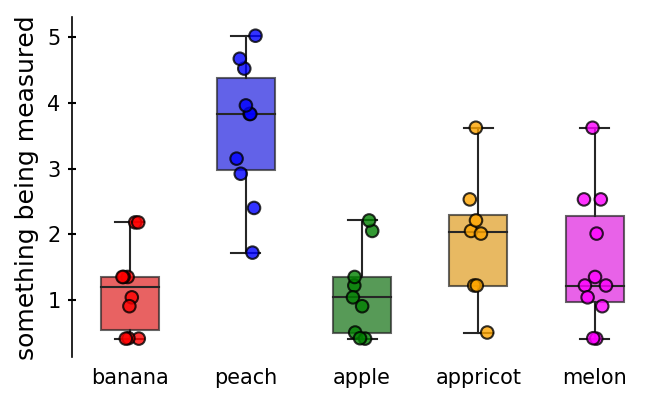

In [49]:
plot_boxplots(boxplots)  
pvals_matrix(boxplots)